<a href="https://colab.research.google.com/github/Mikhail-Klochkov/ml_intro/blob/master/NN_mnist_autoencoder_01_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 2: Deep Learning

Для начала напомним основные понятия машинного обучения.

Что такое моделирование? Это когда мы пытаемся как-то задать зависимость (функцию) между фичами ($X$) и целевой переменной ($y$).

* Для этого мы пользуемся какими-то предположениями о том, как должно выглядеть идеальное решение. Например, мы можем сказать «$y = f_k(x) = kx + \epsilon$ для какого-то $k$», то есть мы можем предположить, что переменные $x$ и $y$ связаны как-то линейно, но коэффициент пропорциональности мы не знаем, и тогда он будет называться **параметром** модели.
* После этого мы вводим какую-то **функцию потерь** (например, $l(y') = (y'-y)^2$) и подбираем параметры модели, которые минимизируют её ожидаемое значение.

Как подбирать эти параметры? В простых случаях, вроде линейной регрессии, они находятся аналитически: нужно взять производную, приравнять к нулю и решить систему уравнений. Но иногда эти функции намного сложнее. Как их оптимизировать?

## Добро пожаловать в мир дифференцируемых функций

Автор определяет следующую «иерархию хороших функций», с точки зрения лёгкости нахождения минимума:

* Аналитически решаемые — их глобальный минимум можно выразить какой-то простой формулой. Пример: линейная регрессия.
* Выпуклые. У них гарантируется решение, причём единственное, и оно быстро ищется разными методами, в частности градиентным спуском (но обычно можно даже быстрее). Пример: логистическая регрессия.
* Дифференцируемые. К ним можно применить градиентный спуск, и, возможно, он сойдётся не к локальному минимуму, а к глобальному. **<-- YOU ARE HERE**
* Дискретные. Тут обычно всё грустно, но нам хотя бы можно быстро узнать её значение.
* Невычислимые. Иногда нам нужно оценивать что-нибудь совсем не формализуемое математикой — например, качество перевода, или поведение пользователя. Невычислимыми функциями, в частности, занимается Reinforcement Learning.

В курсе вы будете заниматься разными способами задания моделей, состоящих только из *дифференцируемых* относительно параметров преобразований, что позволит искать (иногда успешно, иногда нет) набор параметров, при которых ожидание функции потерь имеет минимальное значение.

## Градиентный спуск

**Градиентом** называют вектор (набор чисел), каждой компонентой которого является значение производной по очередному аргументу (при фиксированных остальных).

**Ок, зачем он нужен?** Пусть у нас есть какая-нибудь функция, которую мы хотим минимизировать, и мы предполагаем, что она выглядит как что-то типа гладкой ямы. Тогда мы можем попытаться действовать так: начнем с какой-нибудь точки и будем делать много очень маленьких шажков в сторону наибольшего уменьшения функции, пока не придем в локальный минимум.

* Что значит «в сторону наибольшего уменьшения»? Это значит «против градиаента».
* Что такое «маленький шажок»? Это значит $-\lambda \cdot (f'_1, f'_2, \ldots, f'_n)$. Обычно $\lambda$ это что-то типа $10^{-3}$. Этот параметр называется learning rate (скорость обучения).
* Что значит «пока не придём в локальный минимум». Это значит «пока градиент не ноль». На практике будем проверять, что норма (т. е. длина вектора) больше определенного очень малого $\epsilon$.

Если learning rate достоаточно маленький, мы точно придем хотя бы в локальный минимум. Этот метод называется **градиентным спуском**, и он очень часто применяется для оптимизации тех функций, у которых везде можно быстро посчитать градиент. Гарантированно находить глобальный минимум произвольной функции наука пока не умеет (и вряд ли когда-либо научится).

### Стохастический градиентный спуск

Нам может потребоваться много итераций, чтобы градиентный спуск сошелся. Более того, время выполнения одной итерации может быть очень большим хотя бы потому, что нам нужно каждый раз просмотреть весь датасет. Поэтому для каждого шага градиентного спуска будем использовать не точный градиент, а его оценку: выберем несколько десятков примеров — такой набор называется батчем (англ. batch — пакет, группа) — посчитаем на них градиенты и усредним. Получаем шумную, но приемлимую для нас оценку градиента. Такой вид градиентного спуска называют стохастическим (SGD — stochastic gradient descent).

Почему бы не брать вообще один пример? На самом деле, с точки зрения теории — можно. Но на практике оптимальный размер батча совсем маленьким делать не стоит из-за параллелизма: на устройстах, на которых эти градиенты считаются, затратится меньше времени на пример, если данные обрабатывать не поштучно, а группами (включите GPU в Google Colab и выполните ячейки снизу).

[Можно показать](https://openreview.net/pdf?id=B1Yy1BxCZ), что чтобы скомпенсировать уменьшение размера батча, нужно во столько же раз уменьшить learning rate. Иными словами, более шумные оценки градиента можно компенсировать более мелкими и аккуратными шагами.

<img width='500px' src='https://sqream.com/wp-content/uploads/2017/03/cpu_vs_gpu-11.png'>

Если вы работаете локально, то зайдите на https://pytorch.org/get-started/locally/ и установите PyTorch.

In [1]:
import torch
import numpy as np

In [2]:
A = np.random.randn(1000, 5000)
B = np.random.randn(5000, 2000)

%time C = np.matmul(A, B)

CPU times: user 969 ms, sys: 10 ms, total: 979 ms
Wall time: 497 ms


In [3]:
A = torch.randn(1000, 5000)
B = torch.randn(5000, 2000)

%time C = torch.matmul(A, B)

CPU times: user 236 ms, sys: 696 µs, total: 237 ms
Wall time: 333 ms


In [4]:
# если вы открыли тетрадку через Google Colab, то включите GPU
# (сверху слева Runtime -> Change runtime type... -> GPU)

A = torch.randn(1000, 5000).cuda()
B = torch.randn(5000, 2000).cuda()

%time C = torch.matmul(A, B)

CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 8.33 ms


### Эвристики

В сложных моделях — например, нейросетях — поверхности оптимизируемых функций обычно выглядят весьма страшно:

<img width='250px' src='https://ml4a.github.io/images/figures/non_convex_function.png'>

«Плохих» точек в процессе оптимизации на самом деле существует два типа: где градиент нулевой и где градиент бесконечный.

**Моментум**. Что делать, если мы попали в какую-то точку, где градиента практически нет? Будем шагать каждый раз не в сторону градиента в данной точке, а в сторону *экспоненциально усреднённого* градиента по всем предыдущим итерациям (градиенты с последних итераций будут иметь больший вес). Для этого вводится специальный гиперпараметр $0 < \gamma < 1$, а рядом с каждым параметром хранится усреднённое среднее его градиентов, которое обновляется по следующей формуле:

$$ \hat{g}_i = \hat{g}_{i-1} \cdot \gamma + g_i $$

<img width='250px' src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Saddle_point.svg/300px-Saddle_point.svg.png'>

**RMSProp**. Что делать, если мы на «обрыве»? Будем поддерживать таким же образом усреднённые *квадраты* градиентов, и при обновлении параметров нормировать градиент, деля его на корень из этой оценки. Так оптимизатор будет адаптироваться под «турбулентные» регионы, уменьшая в них размер шага и не давая параметрам улететь куда-то далего из-за обрывов.

<img width='250px' src='https://3.bp.blogspot.com/-fJQ8OM1dHl4/WV363VZZVqI/AAAAAAAAFSk/0e0EuS3WZ9gv5jW93cuF-XjU2FAN42VMQCLcBGAs/s1600/gradient_clipping.png'>

Алгоритм, объединяющий эти две эвристики, называется **Adam**. Он является одним из самых часто используемых оптимизаторов в глубоком обучении.

Подробнее прочитать про эвристики в градиентном спуске можно тут: http://ruder.io/optimizing-gradient-descent/

----

## Практическая часть: фреймворки

Чтобы оптимизировать функцию потерь относительно параметров градиентным спуском, нужно для начала этот градиент хотя бы посчитать. Как вы убедитесь на 3-м занятии, это больно делать вручную. Для этого существуют фреймворки, которые сами посчитают производные за нас. Помимо своей основной функции (поддержка эффективного автоматического дифференцирования и оптимизаторов), они также включают полезные абстракции для машинного обучения.

Фреймворков много, и становится ещё больше. Мы будем использовать **PyTorch**. Вам он будет очень напоминать numpy — по сути он может делать всё то же, только ещё и считать градиенты относительно параметров.

PyTorch можно использовать как замену numpy:

In [5]:
x = torch.tensor([1., 2., 3.])
y = torch.tensor([4., 5., 6.])
z = x + y

print(z)
!nvidia-smi

tensor([5., 7., 9.])
Fri Feb 26 11:02:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    31W /  70W |   1022MiB / 15109MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                   

In [6]:
# при создании переменных можно поставить флаг requires_grad
x = torch.tensor([1., 2., 3], requires_grad=True)

# с этим флагом мы можем делать те же операции, что и раньше
y = torch.tensor([4., 5., 6], requires_grad=True)
z = torch.dot(x, y)
print(z)

tensor(32., grad_fn=<DotBackward>)


...но теперь z кое-что знает о себе:

In [7]:
print(z.grad_fn)

`z` — скаляр, и мы можем продиффиренцировать весь граф относительно него:

In [8]:
z.backward()

И теперь рядом со всеми переменными с requires_grad=True, которые как-либо использовались при получении z, теперь будут их градиенты.

In [9]:
print(x.grad)
print(y.grad)
assert(all((x.grad == y)) and all(y.grad == x)) # it's true

tensor([4., 5., 6.])
tensor([1., 2., 3.])


Мы сможем потом использовать эти градиенты, чтобы оптимально подвинуть параметры в градиентном спуске.

## MNIST

Это всё было абстрактно. Рассмотрим более конкретный пример.

Датасет MNIST включает в себя 70000 черно-белых изображений цифр от 0 до 9, каждое 28 на 28 пиксилей. Задача — предсказать по изображению наиболее вероятную цифру, соответствующую изображению.

<img width='400px' src='https://camo.githubusercontent.com/24545a9ca1aa3b5d1036bd3deaed3ed7ec6cfdc4/68747470733a2f2f692e696d6775722e636f6d2f4954726d3978342e706e67'>

**Нейронная сеть** — это просто какая-то последовательность дифференцируемых операций со входными данными. Обычно эти массовые операции над векторами называют **слоями**. Самый простой пример — матричное умножение, за которым следует операция `softmax`:

$$ \sigma(x)_k = \frac{e^{x_k}}{\sum_i e^{x_i}} $$

Она возвращает вероятностное распределение: нетрудно убедиться, что каждый элемент неотрицателен, и все $\sigma_i$ суммируются в единицу. Если кто помнит, мы только что описали логистическую регрессию, которая тоже в каком-то смысле является очень простой нейросетью.

Обучим какую-нибудь нейросеть, которая принимает вектора размера $784 = 28^2$ и возвращает вероятностное распределение. **ВАЖНО** из-за вычислительных причин мы почти всегда будем обрабатывать данные по батчам, и поэтому размерности входных и промежуточных данных всегда будут вида (batch_size x dim).

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def get_loader(train, batch_size):
    '''Cкачает мнист и сохранит где-то рядом.'''
    
    # Dataset в PyTorch -- это какой-то объект, который оборачивает сырые данные и делает с ними какой-нибудь препроцессинг
    dataset = datasets.MNIST('mnist', train=train, download=True,
        transform = transforms.ToTensor())
    
    # DataLoader делает из датасета генератор, который возвращает данные, сгруппированные по батчам
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return loader


Вам для первого занятия не нужно деталь знать, как устроены Dataset-ы и DataLoader-ы, но в будущем будет полезным прочитать туториал с pytorch.org: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

В качестве функции потерь выберем кроссэнтропию — так же, как и в логистической регрессии. В PyTorch есть функция, которая принимает логарифмы вероятностей и правильные ответы и возвращает кроссэнтропию — `nn.NLLLoss` (negative log likelihood loss). Из-за вычислительных причин (в основном, проблем с точностью), мы почти всегда будем работать с логарифмами вероятностей, а не с самими вероятностями. Чтобы сеть их выдавала, нужно последним слоем добавить слой `nn.LogSoftmax`.

### Как создать простую модель
Базовая конструкция для наших нейросетей - nn.Sequential, которая принимает в качестве своих параметров последовательность слоев, через которые будут последовательно проходить наши данные. Есть два типа слоев: одним нужно знать размерности тензоров, а другим нет. Важно понимать, что поскольку наши данные проходят через слои последовательно, то и размеры тензора могут меняться от слоя к слою.

Перечислим необходимые на первых порах слои:


* nn.Linear — это слой, применяющий линейное преобразование. Собственно, в простых моделях мы обучаем именно его - подбираем необходимые коэффициенты преобразования. Для использования nn.Linear надо указывать размерность входного тензора и размерность желаемого выходного. К примеру, nn.Linear(784, 10) преобразует тензор размера (batch_size, 784) в тензор размера (batch_size, 10). 
* nn.ReLU — это слой, который применяет функцию ReLU, обладающую свойством нелинейности. Зачем это нужно - чуть позже.
* nn.Sigmoid — это слой,  который применяет функцию Sigmoid, обладающую двумя свойствами: во-первых, нелинейностью, а во-вторых, ее значения лежат в промежутке [0, 1].  Если нужна только нелинейность, то лучше использовать ReLU (из-за проблемызатухающего градиента)
* nn.Softmax — про него писали выше. Этот слой по данным выдает вероятностное распределение. В основном нужен для задач классификации.




### Зачем нужна нелинейность

Нелинейные функции также называются функциями-активаторами. Слои с этими функциями обычно не содержат параметров, которые оптимизируются при обучении, а нужны для того, чтобы линейные функции не комбинировались. Ведь композиция линейных функций — это тоже линейная функция. Тогда для композиции слоев B и C существует слой А с такими же параметрами, но требующий меньше ресурсов на обучение.

**Ниже** приведена полносвязная модель состоящая из двух скрытых слоёв
Качество данной модели на validation составляет 96.5 %.

In [35]:
model = nn.Sequential(
    nn.Dropout(p = 0.1), # More effective then regularization
    nn.Linear(28*28, out_features = 100), # We use one hidden layer
    nn.ReLU() ,
    nn.Linear(100, 10), 
    nn.LogSoftmax(dim = 1) 
)

Данная сеть, состоит отдельно из блока свёрточных слоёв с пулингом и нелинейностями RELU, а также блока линейных слоёв с регуляризацией Dropout. Как будет показано далее данная сеть на данных mnist даёт за 30 эпох качество модели выше 98%.



In [14]:
# Сеть, для которой точность выше 97%
class Network(nn.Module):

  def __init__(self):
    super().__init__()
    self.convolution_layers = nn.Sequential(
        nn.Conv2d(1, 12, 3, padding = 1, stride = 1), # 28 28
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2), # 14
        nn.Conv2d(12, 24, 3, padding = 1, stride = 1), # 14
        nn.ReLU(),
        nn.MaxPool2d(2)  # 7
    )
    self.linear_layers = nn.Sequential(
        nn.Linear(in_features = 24 * 7* 7, out_features = 64),          
        nn.ReLU(),
        nn.Dropout(p = 0.2), 
        nn.Linear(in_features = 64, out_features = 10), 
        nn.LogSoftmax(dim = 1)
    )

  def forward(self, x):
    x = self.convolution_layers(x)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x
  


Кроссэнтропия не очень информативна — она меряется в каких-то попугаях, а не в понятных единицах. Нас скорее интересует абсолютная точность классификации:

In [22]:
def accuracy(model, val, flag_conv = True): # standart accuracy
    total = 0
    correct = 0
    for X, y in val:
        if(not flag_conv): # Для несверточных сеток
          X = X.view(-1, 784)
        res = model(X)
        res = res.argmax(dim = 1)
        total += res.shape[0]
        correct += (res == y).sum().item() # item it's 
    return (correct / total) * 100


## Обучение

Следующие блоки кода очень важны, потому что их мы будем использовать постоянно. Что тут происходит:


1.   optimizer —это тот объект, который будет отвечать за градиентный спуск и обновление параметров модели.
2.   criterion — это та самая функция потерь, которую мы минимизируем.
3.   epoch — эпохи. Мы хотим сколько-то раз (например, 10) обработать весь тренировочный датасет, и провести на нем обучение.
4.   zero_grad — мы обнуляем все данные градиентов, которые оптимизатор хранил до этого.
5.   output — получаем результат работы модели.
6.   loss — считаем функцию потерь.
7.   backward — мы получаем градиенты, которыми на этом шаге оптимизатор будет пользоваться при обновлении параметров модели. (см. [backpropagation](https://colab.research.google.com/drive/1U2rElWU-0QVjSy421fsTrRMPUK2p9v9F#scrollTo=JpKNvmHR1I_e&line=12&uniqifier=1))
8.   step — оптимизатор обновляет всю модель.



In [17]:
# dataloader с преобразованием приводящие данные к нормализованному виду в отличае от вложенного диапазона [0, 1]
def get_loader_my(train = True, batch_size = 64):
  dataset = datasets.MNIST('mnist', train = train, download = True,
                           transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean= (0.1307,), std=(0.308, ))                      
                           ]))
  dataloader = torch.utils.data.DataLoader(
      dataset, batch_size = batch_size, shuffle = True
  )
  return dataloader


In [18]:
# Функция обучения нейросети
def train_network(model, optimizer, criterion, loader, epochs = 20):
  """
  model - модель(нейросеть)
  optimizer - выбранный оптимизатор например torch.optim.SGD 
  criterion - функция потерь, для классификации обычно используют перекрёстную энтропию (Negative Log Likehood)
  loader - загрузчик данных (генератор) по batch_size
  epochs - число эпох, для обучения
  """
  train_losses = []
  val_losses = []
  train = loader(train = True, batch_size = 64)
  val = loader(train = False, batch_size = 64)
  # we check some parameters
  shapes_of_parameters = np.array(list(map(lambda x: len(x.shape), model.parameters())))
  this_conv = False
  if( np.any(shapes_of_parameters > 2) ):
    this_conv = True
    print('have conv layer(s) ')

  for epoch in tqdm(np.arange(epochs)):
    for (X, y), (X_v, y_v) in zip(train, val):
      # we take images (64 1 28 28)
      if(not this_conv):
        print('here')
        X = X.view(X.shape[0], -1)
        X_v = X_v.view(X_v.shape[0], -1)
      
      optimizer.zero_grad()
      
      output = model(X)
      loss = criterion(output, y)

      with torch.no_grad():
    ## with torch.no_grad():
        model.eval()
        loss_v = criterion(model(X_v), y_v)
        val_losses.append(loss_v.item())
      
      model.train()
      loss.backward()

      train_losses.append(loss.item())
      optimizer.step()
    print('epoch: {} train: {}  test:  {}'.format(epoch, accuracy(model, train, flag_conv = this_conv), 
                                                  accuracy(model, val, flag_conv = this_conv)))
    print(X.shape, y.shape, X_v.shape, y_v.shape)
    break
  plt.plot(train_losses, c = 'b', label = 'train')
  plt.plot(val_losses, c = 'r', label = 'test')
  plt.legend()
  plt.show()

# Нужно корректнее реализовать отдельно обучение и evaliution mode не совсем корректно обчвется
#net = Network()
# Обучение нашей сети с сверточными слоями на данных MNIST
#train_network(net, torch.optim.SGD(net.parameters(), lr = 0.01), nn.NLLLoss(), get_loader_my, epochs = 30)

Обучение нейросети, без свёрточных слоёв.







  0%|          | 0/10 [00:00<?, ?it/s]




 10%|█         | 1/10 [00:11<01:40, 11.13s/it]

acc train: 95.5283,    acc val: 95.1400







 20%|██        | 2/10 [00:22<01:29, 11.25s/it]

acc train: 95.9083,    acc val: 95.1400







 30%|███       | 3/10 [00:34<01:18, 11.28s/it]

acc train: 96.8267,    acc val: 96.1100







 40%|████      | 4/10 [00:45<01:07, 11.20s/it]

acc train: 96.2717,    acc val: 95.1800







 50%|█████     | 5/10 [00:56<00:56, 11.26s/it]

acc train: 97.2117,    acc val: 96.1200







 60%|██████    | 6/10 [01:07<00:45, 11.34s/it]

acc train: 97.0783,    acc val: 96.0400







 70%|███████   | 7/10 [01:18<00:33, 11.04s/it]

acc train: 97.7167,    acc val: 96.5400







 80%|████████  | 8/10 [01:29<00:22, 11.07s/it]

acc train: 97.7167,    acc val: 96.4500







 90%|█████████ | 9/10 [01:39<00:10, 10.91s/it]

acc train: 97.8317,    acc val: 96.7500







100%|██████████| 10/10 [01:51<00:00, 11.12s/it]

acc train: 97.5300,    acc val: 96.2700


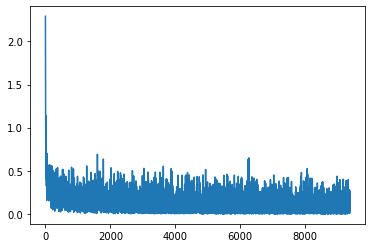

In [36]:
# Ещё раз, на всякий случай, чтобы не переобучать уже один раз обученную модель.
model = nn.Sequential(
    nn.Dropout(p = 0.1), # More effective then regularization
    nn.Linear(28*28, out_features = 100), # We use one hidden layer
    nn.ReLU() ,
    nn.Linear(100, 10), 
    nn.LogSoftmax(dim = 1) 
)

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2) 
criterion = nn.NLLLoss() 

# Без стандартизации
train = get_loader(train = True, batch_size = 64)
val = get_loader(train = False, batch_size = 64)

train_losses = []
val_losses = []
acc_train = []
acc_val = []
for epoch in tqdm(range(10)):
    for X, y in train:
        # нам необходимо перевести картинку в вектор
        X = X.view(-1, 784)  # разгладим картинку в вектор
        optimizer.zero_grad()
        
        output = model(X)
        loss = criterion(output, y)
        loss.backward()

        train_losses.append(loss.item()) 
        optimizer.step()
    
    acc_train.append(accuracy(model, train, flag_conv = False))
    acc_val.append(accuracy(model, val,  flag_conv = False))


    print('acc train: {:.4f},    acc val: {:.4f}'.format(acc_train[-1], acc_val[-1]))
        
plt.plot(train_losses)
plt.show() 

In [38]:
print('the best on validation set: {:.4f}'.format(max(acc_val))) # Ну это тоже грубо, вдруг модель просто попала в начале итераций по эпохам в 
# нужные параметры, толком не обучившись, поэтому лучше брать больше эпох и смотреть начиная с какой точность либо не растёт, либо падает.
print('the best on train set: {:.4f}'.format(max(acc_train)))

the best on validation set: 96.7500
the best on train set: 97.8317


Модель, с свёрточным блоком слоёв. 


  3%|▎         | 1/30 [00:49<23:42, 49.05s/it]

0.9208666666666666 0.9247



  7%|▋         | 2/30 [01:37<22:44, 48.72s/it]

0.9497666666666666 0.9532



 10%|█         | 3/30 [02:24<21:49, 48.48s/it]

0.96115 0.9586



 13%|█▎        | 4/30 [03:11<20:48, 48.03s/it]

0.96455 0.9644



 17%|█▋        | 5/30 [03:58<19:51, 47.68s/it]

0.9718333333333333 0.9726



 20%|██        | 6/30 [04:45<19:00, 47.51s/it]

0.97465 0.9754



 23%|██▎       | 7/30 [05:32<18:08, 47.31s/it]

0.9776 0.975



 27%|██▋       | 8/30 [06:19<17:15, 47.08s/it]

0.9776333333333334 0.978



 30%|███       | 9/30 [07:05<16:23, 46.82s/it]

0.9776666666666667 0.9765



 33%|███▎      | 10/30 [07:51<15:31, 46.59s/it]

0.9807833333333333 0.9778



 37%|███▋      | 11/30 [08:37<14:41, 46.42s/it]

0.9823833333333334 0.9802



 40%|████      | 12/30 [09:23<13:54, 46.37s/it]

0.9826666666666667 0.9804



 43%|████▎     | 13/30 [10:10<13:07, 46.34s/it]

0.9844333333333334 0.9829



 47%|████▋     | 14/30 [10:57<12:28, 46.77s/it]

0.9855666666666667 0.9836



 50%|█████     | 15/30 [11:45<11:47, 47.16s/it]

0.9850666666666666 0.9837



 53%|█████▎    | 16/30 [12:33<11:00, 47.17s/it]

0.9862 0.9829



 57%|█████▋    | 17/30 [13:20<10:12, 47.12s/it]

0.9872333333333333 0.9833



 60%|██████    | 18/30 [14:06<09:23, 46.92s/it]

0.9872666666666666 0.9855



 63%|██████▎   | 19/30 [14:52<08:33, 46.72s/it]

0.98715 0.9833



 67%|██████▋   | 20/30 [15:40<07:50, 47.04s/it]

0.9877166666666667 0.9861



 70%|███████   | 21/30 [16:29<07:07, 47.51s/it]

0.9880666666666666 0.9836



 73%|███████▎  | 22/30 [17:17<06:22, 47.81s/it]

0.9881333333333333 0.9842



 77%|███████▋  | 23/30 [18:06<05:36, 48.13s/it]

0.9892833333333333 0.9871



 80%|████████  | 24/30 [18:53<04:46, 47.78s/it]

0.9902666666666666 0.9873



 83%|████████▎ | 25/30 [19:39<03:56, 47.32s/it]

0.9904666666666667 0.9857



 87%|████████▋ | 26/30 [20:26<03:08, 47.07s/it]

0.9899666666666667 0.9851



 90%|█████████ | 27/30 [21:13<02:21, 47.01s/it]

0.9888666666666667 0.9827



 93%|█████████▎| 28/30 [22:00<01:34, 47.02s/it]

0.99135 0.9872



 97%|█████████▋| 29/30 [22:47<00:47, 47.07s/it]

0.99125 0.986



100%|██████████| 30/30 [23:34<00:00, 47.14s/it]

0.9917 0.9866


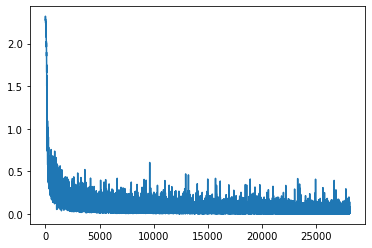

In [90]:

network = Network()

optimizer = torch.optim.SGD(network.parameters(), lr = 1e-2) 
criterion = nn.NLLLoss() 

train = get_loader_my(train = True, batch_size = 64)
val = get_loader_my(train = False, batch_size = 64)

train_losses = []
val_losses = []
for epoch in tqdm(range(30)):
    for X, y in train:
        #X = X.view(-1, 784)  # разгладим картинку в вектор
        optimizer.zero_grad()
        
        output = network(X)
        loss = criterion(output, y)
        loss.backward()

        train_losses.append(loss.item()) 
        optimizer.step()
    
    print(accuracy(network, train, flag_conv = True), accuracy(network, val, flag_conv = True))
        
plt.plot(train_losses)
plt.show() 

Как видно, точность на валидации держиться на уровне 98.5 процента начиная с 23 эпохи.

### Регуляризация

Вы можете заметить, что с какого-то момента функция потерь на `val` перестаёт падать (а потом и начинает расти), при этом лосс на `train` стабильно убывает. Это связано с переобучением. Если сеть достаточно большая, то нейроны смогут адаптироваться для получения меньшего лосса на отдельном примере, что не очень хорошо обобщается под данные, которые модель ещё не видела. Например сеть может выучить правило «если этот пиксель имеет такое-то значение, то это шестёрка», в структуре сети это будет выражаться очень сильной связью между нейронами. Для этого в нейросетях используют методы регуляризации на веса сети или на процесс обучения.

Самый популярный из них на данный момент — Dropout (в PyTorch — `nn.Dropout`). Это отдельный слой, который во время обучения с вероятностью $p$ независимо по всем элементам зануляет их значения. Это мешает нейронам адаптироваться.

<img width='600px' src='https://cdn-images-1.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png'>

## Автоэнкодеры

**Автоэнкодеры** — это сети, которые учатся восстанавливать свои же входные данные. Такой тип обучения иногда называют self-supervised.


<img width='400px' src='https://habrastorage.org/web/cf6/228/613/cf6228613fdc4f8fb819cbd41bb677eb.png'>

Казалось бы, выучить функцию $f(x) = x$ очень легко, но в автоэнкодеры устроены так, что внутри них вся информация в какой-то момент проходит через скрытый слой небольшой размерности, и поэтому автоэнкодеры просто не имеют возможности идеально точно скопировать свой вход на выходе.

Поэтому сети приходится выучивать в этом крытом очень сжатое и информативное представление данных, что потом можно будет использовать для разных интересных вещей.

Например, для визуализации: можно сделать скрытый слой размера 2 и вывести данные на плоскость.

<img width='800px' src='https://i.stack.imgur.com/2gSs1.png'>

Повсеместно используемый PCA на самом деле является частным случаем автоэнкодера: из преобразований разрешается использовать только линейные.

Мы также можем использовать скрытые состояния для морфинга — плавного перехода между объектами.

<img width='250px' src='https://camo.githubusercontent.com/fa61cfca07320919eb6430a2a06f98d3e68e29c1/68747470733a2f2f692e696d6775722e636f6d2f4f72554a7339562e676966'>

Обозначим уже обученный на данных энкодер как функцию $e$, а декодер как функцию $g$. Тогда морфинг между изображениями $A$ и $B$ мы можем сделать так: переведем изображения A и B в скрытые состояния $a = e(A)$ и $b = e(B)$, а затем каждый кадр генерируется как

$$ C = d((1-t) \cdot a + t \cdot b) $$

где $t$ равномерно изменяется от 0 до 1. Иными словами, мы берём все точки на отрезке ab и последовательно декодируем.

Это вам и предстоит реализовать.

Ниже приведён класс модели  для автоэнокеда


In [39]:
train = get_loader_my(train = True, batch_size = 64) # Решил седлать с нормализацией
val = get_loader_my(train = False, batch_size = 64)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(28 * 28, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )
        self.decode = nn.Sequential(
            nn.Linear(2, 50),
            nn.ReLU(),
            nn.Linear(50, 100),
            nn.ReLU(),
            nn.Linear(100, 28 * 28),
            nn.Sigmoid()
            )
            # картинки -- это тензоры со значениями от 0 до 1
            # нет особого смысла выводить что-то не из этого промежутка
            
    def forward(self, x):
        return self.decode(self.encode(x))

model_ae = Autoencoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_ae.parameters())

In [40]:
# обучение автоэнкодера 
for epoch in range(10):
    train_loss = 0
    for data, _ in train:
        data = data.view(-1, 784)
        
        optimizer.zero_grad()
        
        reconstructed = model_ae(data)
        loss = criterion(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer.step()

    print('epoch %d, loss %.4f' % (epoch, train_loss / len(train)))

epoch 0, loss 0.7384
epoch 1, loss 0.6862
epoch 2, loss 0.6767
epoch 3, loss 0.6716
epoch 4, loss 0.6683
epoch 5, loss 0.6657
epoch 6, loss 0.6628
epoch 7, loss 0.6608
epoch 8, loss 0.6588
epoch 9, loss 0.6572


In [41]:
def get_item(x):
  X = train.dataset[x][0]
  return X.view(X.shape[0], -1)

# Построим для нашей неросетки множество примеров в латентном пространстве размерности 2
train = get_loader(True, batch_size=64)
val = get_loader(False, batch_size=64 )
all_data = [train, val]
all_answer = {}
all_labels = {}
for idx, pack in enumerate(all_data):
  answer_pack = np.empty((0, 2))
  labels_pack = []
  for X, y in pack:
    X = X.view(X.shape[0], -1)

    answer_pack = np.concatenate([answer_pack, model_ae.encode(X).detach().numpy()]) # Здесь мы вызываем пример из датентного пространства 
    
    labels_pack += y.numpy().tolist()
  all_answer['pack' + str(idx)] = answer_pack
  all_labels['pack' + str(idx)] = labels_pack


In [42]:
# собираем все y
pack_l1 = all_labels['pack0']
pack_l2 = all_labels['pack1']
pack_all_l = pack_l1 + pack_l2


In [43]:
# собираем все h
pack1_h = all_answer['pack0']
pack2_h = all_answer['pack1']
pack_all_h = np.concatenate([pack1_h, pack2_h]) # all coordinate [train, test]
pack_all_h.shape


(70000, 2)

In [44]:
import matplotlib.colors as mcolors
dict_of_colors = mcolors.TABLEAU_COLORS
color_list = list(dict_of_colors.keys())
color_list

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

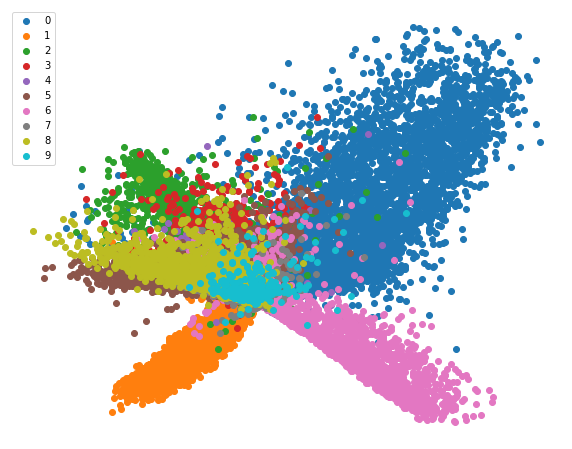

In [45]:
# Отрисуем график для изображения объектов в простарнстве размерности 2, которое было получено автоэнкодером
fig, ax = plt.subplots(figsize = (10, 8)) 
y_unique = np.arange(10)
for y in y_unique[::]:
  ax = plt.gca()
  idxs =  np.arange(pack_all_l.__len__())[(pack_all_l == y)] # Индексы конкретного класса для отрисовки
  scatter = ax.scatter(pack_all_h[idxs, 0], pack_all_h[idxs, 1], c = color_list[y],
                                            label = str(y))

ax.legend()
ax.axis('off');

In [46]:
# Соберем в кучку train и test для того, чтобы преобразовать в двумерное пространство для алгоритма pca 
train_arr = train.dataset.data.view(-1, 28 * 28).numpy()
val_arr = val.dataset.data.view(-1, 28 * 28).numpy()
data_arr = np.concatenate([train_arr, val_arr])
y_train = train.dataset.targets.numpy()
y_val = val.dataset.targets.numpy()
y_data = np.concatenate([y_train, y_val])
y_data.shape

(70000,)

In [47]:
# сравним данную картинку с PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_h_arr = pca.fit_transform(data_arr)


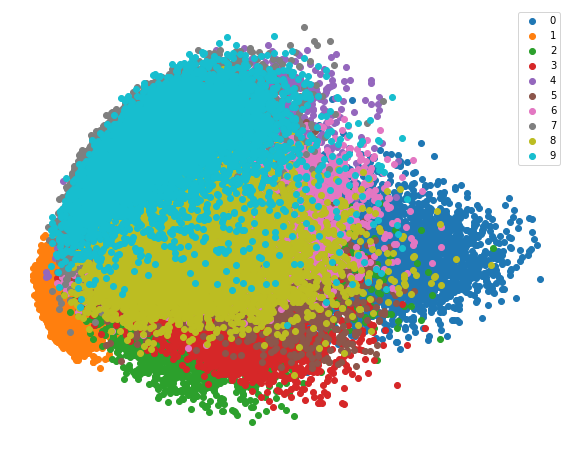

In [48]:
fig, ax = plt.subplots(figsize = (10, 8)) 
y_unique = np.arange(10)
for y in y_unique:
  ax = plt.gca()
  idxs =  np.arange(len(y_data))[(y_data == y)] # Индексы конкретного класса для отрисовки
  scatter = ax.scatter(data_h_arr[idxs, 0], data_h_arr[idxs, 1], c = color_list[y],
                                            label = str(y))

ax.legend()
ax.axis('off');

Теперь попытаемся сделать гифку, как выше.

Анимации `matplotlib` — это жесть, не надо особо пытаться разобраться в коде снизу. Возможно, вам придётся пройти квест и поставить `ffmpeg` (`apt instal ffmpeg`, `pip install ffmpeg` и перезапуска тетрадки должно хватить в большинстве случаев).

In [49]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

In [50]:
def get(x):
    return train.dataset[x][0].view(1, 784)

def imshow(img):
    pic = img.numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(inputs, steps, delay):
    # перегоняем в латентное пространство все картинки на входе
    latent = [model_ae.encode(get(k)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in np.linspace(0, 1, steps):
            # получаем проинтерполированную точку
            c = a*(1-t) + b*t
            # ...и декодируем её в изображение
            morphed = model_ae.decode(c).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    
    ani = animation.ArtistAnimation(fig, images, interval=delay)

    display(HTML(ani.to_html5_video()))

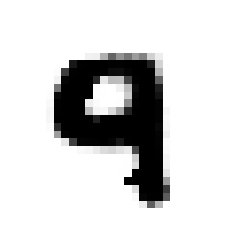

In [51]:
morph(np.random.randint(0, len(train.dataset), 30), 20, 30);

# Домашнее задание

* Получить точность 97% на валидации MNIST.
* Реализовать морфинг автоэнкодером (получите красивую гифку).
* Визуализировать MNIST автоэнкодером (просто обучить автоэнкодер с латентным пространством размерности 2 и вывести через scatter точки разного цвета).

### *Свёртки

Если у вас останется время, вы можете улучшить результаты, используя свёртки.

О свёрточных сетях в деталях вы узнаете на следующем занятии, а пока что вы можете использовать `nn.Conv2d`, `nn.MaxPool2d`, и `nn.ConvTranspose2d` просто как более продвинутые слои для классификатора и автоэнкодера, даже не особо понимая, как они внутри работают.

Основная задача «нейроинженеров» — придумать, как выглядело бы решение этой задачи на уровне программы с неизвестными параметрами, и подбирать соответствующие архитектуры. [Эксперименты с дропаутом](https://arxiv.org/pdf/1701.05369.pdf) показывают, что в Linear примерно 99% весов на самом деле можно выкинуть. Логично, что в оптимальной архитектуре не должно быть бесполезных весов — лишние параметры всегда ведут к переобучению. В случае с картинками решение в том, чтобы использовать информацию о расположении пикселей относительно друг друга, чтобы создать слой, который смотрит на более релевантные фичи. Мотивация заключается примерно в этом, подробнее — через неделю.

<img width='250px' src='https://cdn-images-1.medium.com/max/1600/0*iqNdZWyNeCr5tCkc.'>